In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/06


In [2]:
# Open the run 2 and run 3 files
file2 = ROOT.TFile("pt_dists.root")
file3 = ROOT.TFile("pt_dists_run3.root")

In [3]:
# These are the histogram names (suppressing a common h_")
histNames = ['pi0', 'rho', 'omega', 'phi', 'eta', 'etap', 'mu_nonbc']

In [4]:
# Get the histograms in two lists
lh2 = []
lh3 = []
for n in histNames:
    lh2.append(file2.Get("h_"+n))
    lh3.append(file3.Get("h_"+n))

# Get the bin contents and the bin edges into their own lists 
cont2 = []
bins2 = []
cont3 = []
bins3 = []
for i in range(len(histNames)):
    h2 = lh2[i]
    h3 = lh3[i]
    cont2.append([h2.GetBinContent(i) for i in range(1, h2.GetNbinsX()+1)])
    cont3.append([h3.GetBinContent(i) for i in range(1, h3.GetNbinsX()+1)])
    bins2.append([h2.GetBinLowEdge(i) for i in range(1, h2.GetNbinsX()+2)])
    bins3.append([h3.GetBinLowEdge(i) for i in range(1, h3.GetNbinsX()+2)])



In [5]:
# Sanity check....are the bis the same for the same histogram
# Also...get the bin centers
binsc = []
for b2,b3 in zip(bins2,bins3):
    temp2 = np.array(b2)
    temp3 = np.array(b3)
    diff  = np.abs(temp2-temp3)
    print(np.amax(diff))
    binsc.append(  0.5 * (temp2[1:] + temp2[:-1]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0


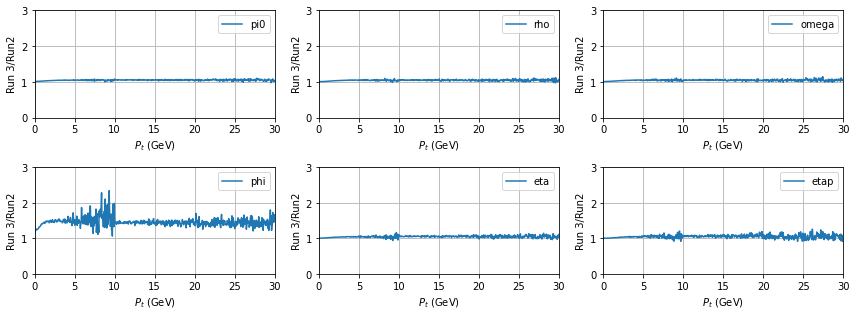

In [6]:
ipl = 1
figure = plt.figure(figsize=(12, 4.5))
for c2,c3,b,n in zip(cont2,cont3,binsc,histNames):
    # skip the muons
    if n == "mu_nonbc":
        continue
    ax    = plt.subplot(230+ipl)
    ipl   = ipl+1
    ax.plot(b, np.array(c3)/np.array(c2), label=n)
    ax.set_xlim(0,30)
    ax.set_ylim(0,3)
    ax.legend()
    ax.grid()
    ax.set_xlabel("$P_t$ (GeV)")
    ax.set_ylabel("Run 3/Run2")
plt.tight_layout()

In [7]:
# rebinning...
def rebinContents(x,factor):
    return np.array([x.sum() for x in np.hsplit(x,len(x)/factor)])
def rebinBins(x, factor):
    return np.array([x.mean() for x in np.hsplit(x,len(x)/factor)])


# check that it works
x   = np.array([1,2,3,4,5,6,7,8,9])
xC = rebinContents(x,3)
xB = rebinBins(x,3)
print(x,xC)
print(x,xB)

[1 2 3 4 5 6 7 8 9] [ 6 15 24]
[1 2 3 4 5 6 7 8 9] [2. 5. 8.]


<ipython-input-8-c55d1409a700>:5: RuntimeWarning: divide by zero encountered in divide
  r = c3/c2
<ipython-input-8-c55d1409a700>:5: RuntimeWarning: invalid value encountered in divide
  r = c3/c2


Text(0, 0.5, 'Run 3/Run2')

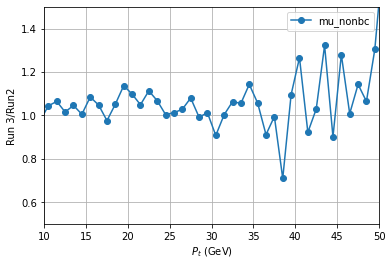

In [8]:
# Now for the muons (the last in the lists)
c2 = rebinContents(np.array(cont2[-1]),20)
c3 = rebinContents(np.array(cont3[-1]),20)
b  = rebinBins(binsc[-1],20)
r = c3/c2
n  = histNames[-1]
ax = plt.subplot(111)
ax.plot(b, r, label=n, marker='o')
ax.set_xlim(10,50)
ax.set_ylim(0.5,1.5)
ax.legend()
ax.grid()
ax.set_xlabel("$P_t$ (GeV)")
ax.set_ylabel("Run 3/Run2")